<a href="https://www.kaggle.com/code/dosidhruv/floodai-hackathon-surat2006?scriptVersionId=196339899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Training data - 08/08/06 7:00 PM -09/08/06 4:00 AM
Test Part - 09/08/06 5:00 AM - 8:00 AM \
Training on smaller dataset as per the computational power and hackathon time limit

In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from shapely import wkt

In [2]:

file_paths = [f"/kaggle/input/suratflood2006/Results/Surat_Validation_2006_Flood_elements_{str(i).zfill(3)}.shp" for i in range(140, 152)]

gdfs = [gpd.read_file(fp) for fp in file_paths]
combined_gdf = pd.concat(gdfs, ignore_index=True)

In [3]:
combined_gdf.head()

,Total wate,geometry
0,4.4625,"POLYGON ((260623.187 2330106.690, 260393.312 2..."
1,4.4628,"POLYGON ((260393.312 2329288.013, 259816.901 2..."
2,4.4634,"POLYGON ((259873.123 2330028.938, 259816.901 2..."
3,4.4646,"POLYGON ((259647.535 2330789.408, 259873.123 2..."
4,4.4640,"POLYGON ((259873.123 2330028.938, 259240.489 2..."


Total wate - Total water

In [4]:
comgdf_upcrs = combined_gdf.to_crs(epsg=4326)

In [5]:
comgdf_upcrs['geometry'] = comgdf_upcrs['geometry'].apply(lambda x: x.wkt)

comgdf_upcrs[['Total wate', 'geometry']].to_csv("/kaggle/working/combined.csv", index=False)

/tmp/ipykernel_23/1538010478.py:1: UserWarning: Geometry column does not contain geometry.
  comgdf_upcrs['geometry'] = comgdf_upcrs['geometry'].apply(lambda x: x.wkt)


In [6]:
split_index = 1346094 
#Need continous break because of time series data

train_gdf = comgdf_upcrs.iloc[:split_index]
test_gdf = comgdf_upcrs.iloc[split_index:]

In [7]:
train_gdf.shape, test_gdf.shape

((1346094, 2), (448698, 2))

In [8]:
train_gdf.head()

,Total wate,geometry
0,4.4625,"POLYGON ((72.69632207887796 21.05628669540427,..."
1,4.4628,"POLYGON ((72.6942250843725 21.048865473753924,..."
2,4.4634,POLYGON ((72.68911899949873 21.055486702454402...
3,4.4646,"POLYGON ((72.6868432060074 21.062322825901894,..."
4,4.4640,POLYGON ((72.68911899949873 21.055486702454402...


In [9]:
test_gdf.head()

,Total wate,geometry
1346094,5.2133,"POLYGON ((72.69632207887796 21.05628669540427,..."
1346095,5.2131,"POLYGON ((72.6942250843725 21.048865473753924,..."
1346096,5.2121,POLYGON ((72.68911899949873 21.055486702454402...
1346097,5.2122,"POLYGON ((72.6868432060074 21.062322825901894,..."
1346098,5.2122,POLYGON ((72.68911899949873 21.055486702454402...


In [10]:
def prepare_gdf(df):
    if 'geometry' not in df.columns:
        raise KeyError("The input DataFrame does not contain a 'geometry' column.")
    
    if df['geometry'].dtype == 'object':
        try:
            df['geometry'] = df['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
        except Exception as e:
            raise ValueError(f"Error converting WKT to geometries: {e}")
    
    if not isinstance(df, gpd.GeoDataFrame):
        df = gpd.GeoDataFrame(df, geometry='geometry')

    df['area'] = df['geometry'].area
    df['perimeter'] = df['geometry'].length
    df['centroid_x'] = df['geometry'].centroid.x
    df['centroid_y'] = df['geometry'].centroid.y

    df['bbox_minx'] = df['geometry'].bounds.minx
    df['bbox_miny'] = df['geometry'].bounds.miny
    df['bbox_maxx'] = df['geometry'].bounds.maxx
    df['bbox_maxy'] = df['geometry'].bounds.maxy

    df_model_ready = df.drop(columns=['geometry'])

    df_model_ready = df_model_ready.reset_index(drop=True)
    
    return df_model_ready

train_gdf_model_ready = prepare_gdf(train_gdf)
test_gdf_model_ready = prepare_gdf(test_gdf)


/tmp/ipykernel_23/1961207683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
/tmp/ipykernel_23/1961207683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)


In [11]:
train_gdf_model_ready.head()

,Total wate,area,perimeter,centroid_x,centroid_y,bbox_minx,bbox_miny,bbox_maxx,bbox_maxy
0,4.4625,0.000026,0.023321,72.693222,21.053546,72.689119,21.048865,72.696322,21.056287
1,4.4628,0.000014,0.019084,72.690666,21.051661,72.688653,21.048865,72.694225,21.055487
2,4.4634,0.000014,0.017504,72.686951,21.052839,72.683081,21.050632,72.689119,21.055487
3,4.4646,0.000022,0.021460,72.685953,21.058568,72.681895,21.055487,72.689119,21.062323
4,4.4640,0.000018,0.020018,72.684698,21.055259,72.681895,21.052398,72.689119,21.057894


In [12]:
X_train = train_gdf_model_ready.drop(columns=['Total wate'])
y_train = train_gdf_model_ready['Total wate']

X_test = test_gdf_model_ready.drop(columns=['Total wate'])
y_test = test_gdf_model_ready['Total wate']

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.1126034030944177
R-squared: 0.9797919947016289


In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [18]:
assert len(y_pred) == len(test_gdf)

In [19]:
test_gdf.head()

,Total wate,geometry
1346094,5.2133,"POLYGON ((72.69632207887796 21.05628669540427,..."
1346095,5.2131,"POLYGON ((72.6942250843725 21.048865473753924,..."
1346096,5.2121,POLYGON ((72.68911899949873 21.055486702454402...
1346097,5.2122,"POLYGON ((72.6868432060074 21.062322825901894,..."
1346098,5.2122,POLYGON ((72.68911899949873 21.055486702454402...


In [20]:
norm = mcolors.Normalize(vmin=y_pred.min(), vmax=y_pred.max())

In [21]:
cmap = plt.cm.viridis  # You can choose other colormaps like 'plasma', 'inferno', etc.

In [22]:
import folium
from folium import Choropleth, LayerControl, Map, features

In [23]:
import numpy as np

In [24]:
y_pred_normalized = (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))

In [25]:
test_gdf = test_gdf.set_geometry('geometry')

centroid = test_gdf.geometry.centroid
mean_lat = centroid.y.mean()
mean_lon = centroid.x.mean()

In [26]:
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

In [27]:
test_gdf.shape, y_pred_normalized.shape

((448698, 2), (448698,))

In [28]:
for idx, row in enumerate(test_gdf.iterrows()):
    row = row[1]  # Unpack the row from iterrows
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    
    folium.GeoJson(
        data=geo_j,
        style_function=lambda x, color=y_pred_normalized[idx]: {
            'fillColor': plt.cm.coolwarm(color),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6,
        }
    ).add_to(m)



In [29]:
m.save('map.html')

In [30]:
y_pred.shape

(448698,)

In [31]:
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)


In [32]:

# Filter the DataFrame and y_pred based on the condition
filtered_gdf = test_gdf[(y_pred > 3) & (y_pred < 7)]
filtered_y_pred_normalized = y_pred_normalized[(y_pred > 3) & (y_pred < 7)]

In [33]:
filtered_gdf.shape, filtered_y_pred_normalized.shape

((41688, 2), (41688,))

In [34]:
for i, (idx, row) in enumerate(filtered_gdf.iterrows()):
    # Simplify the geometry
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    
    folium.GeoJson(
        data=geo_j,
        style_function=lambda x, color=filtered_y_pred_normalized[i]: {
            'fillColor': plt.cm.coolwarm(color),
            'color': 'red',
            'weight': 1,
            'fillOpacity': 0.6,
        }
    ).add_to(m)


In [35]:
m.save('map_highrisk.html')

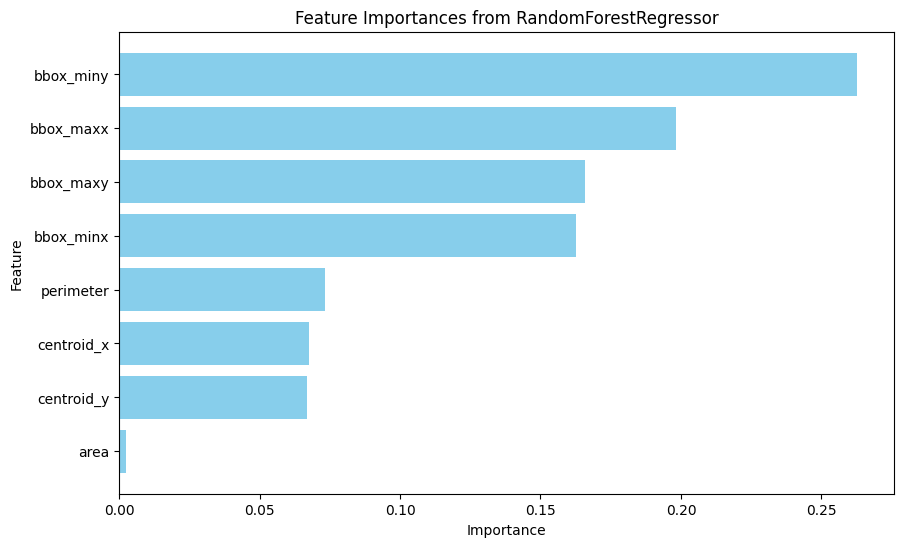

In [36]:
importances = model.feature_importances_

features = X_train.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})


feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestRegressor')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()